In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [2]:
bike_df=pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
## checking if there is any null columns so that if any the values has to be either populated or removed

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# checking the spage 
bike_df.shape

(730, 16)

### Dropping the columns of casual and registered as they are redudant columns because cnt is the sum of the casual and registered 



In [7]:
bike_df=bike_df.drop(['casual','registered'], axis=1)

In [8]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


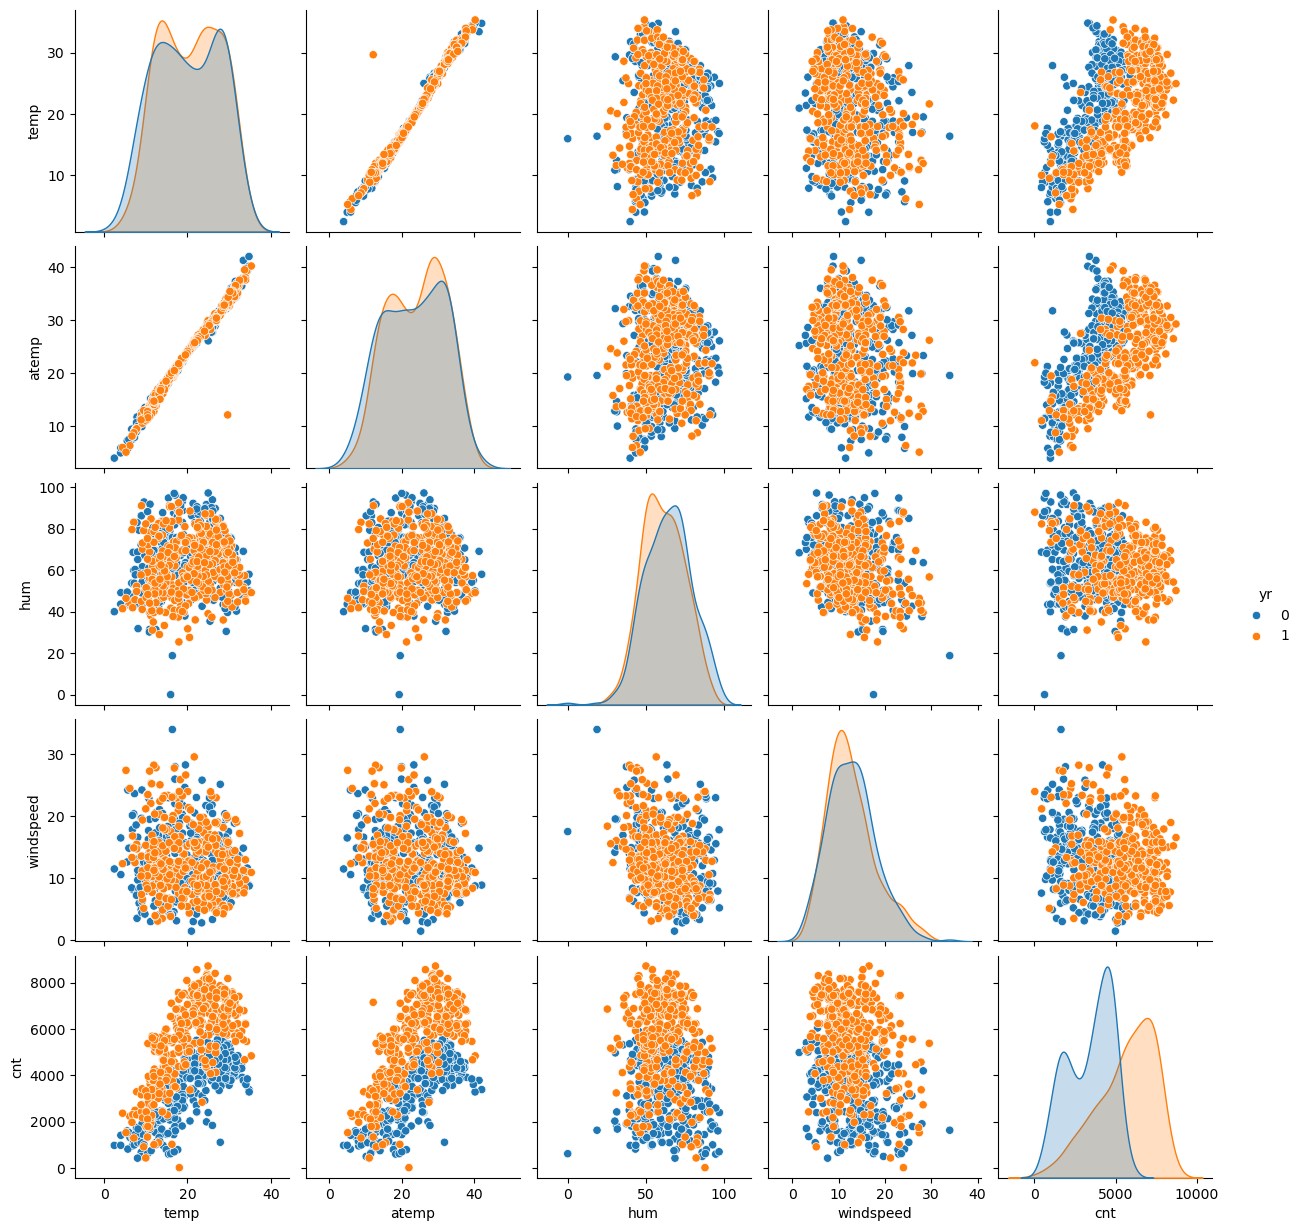

In [9]:
# visualizing the numerical data to check the linear relationship aganist cnt varaible 

x=sns.pairplot(bike_df,vars=['temp','atemp','hum','windspeed','cnt'],hue='yr')
plt.show()


### we see there is some sort of linear relationship between the temperate and the cnt 

In [11]:
#copying the dataframe to convert cattegorical column values to string for better understadning of the boxplot
bike_mod=bike_df.copy()
bike_mod['season']=bike_mod.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike_mod['mnth']=bike_mod.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_mod['weathersit']=bike_mod.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike_mod['weekday']=bike_mod.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


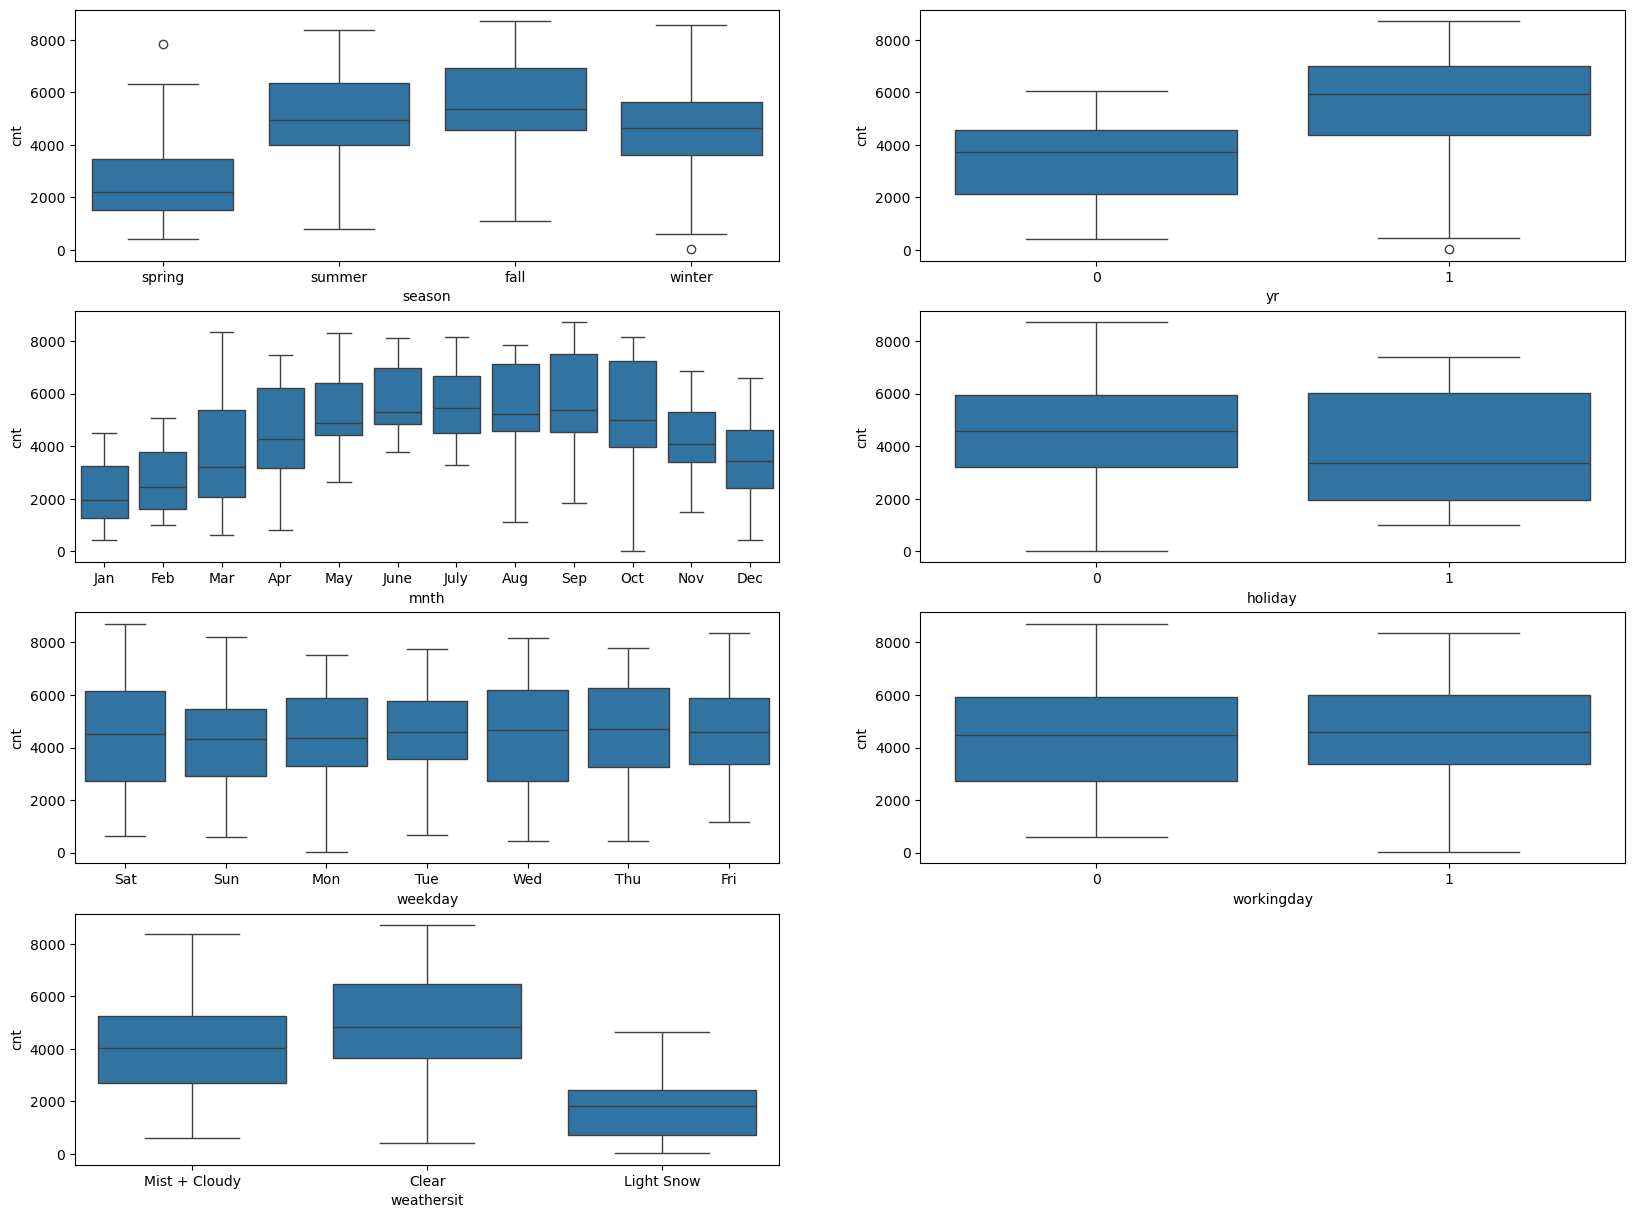

In [12]:
# checking count aganist categorail variables season,year.month holiday,weekday and working day

plt.figure(figsize=(20,15))
plt.subplot(4,2,1)
sns.boxplot(x='season',y='cnt',data=bike_mod)
plt.subplot(4,2,2)
sns.boxplot(x='yr',y='cnt',data=bike_mod)
plt.subplot(4,2,3)
sns.boxplot(x='mnth',y='cnt',data=bike_mod)
plt.subplot(4,2,4)
sns.boxplot(x='holiday',y='cnt',data=bike_mod)
plt.subplot(4,2,5)
sns.boxplot(x='weekday',y='cnt',data=bike_mod)
plt.subplot(4,2,6)
sns.boxplot(x='workingday',y='cnt',data=bike_mod)
plt.subplot(4,2,7)
sns.boxplot(x='weathersit',y='cnt',data=bike_mod)
plt.show()



# Below are the obersvations 

- 1. summer and fall has the higher number of cnt when compared to other two months 
- 2. year 2019 has more cnt when compared to 2018
- 3. summer months have more number of cnts.
- 4. during the light snow the counts are low where as during the clear weather the counts are high
- 5. Month of sep and oct has very high rental counts


In [14]:
#the date column can be dropped as we have month and the year seperately 

bike_df=bike_df.drop('dteday',axis=1)




In [15]:
# instant column can also be dropped as it is just the indeex 

bike_df=bike_df.drop('instant',axis=1)

In [16]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


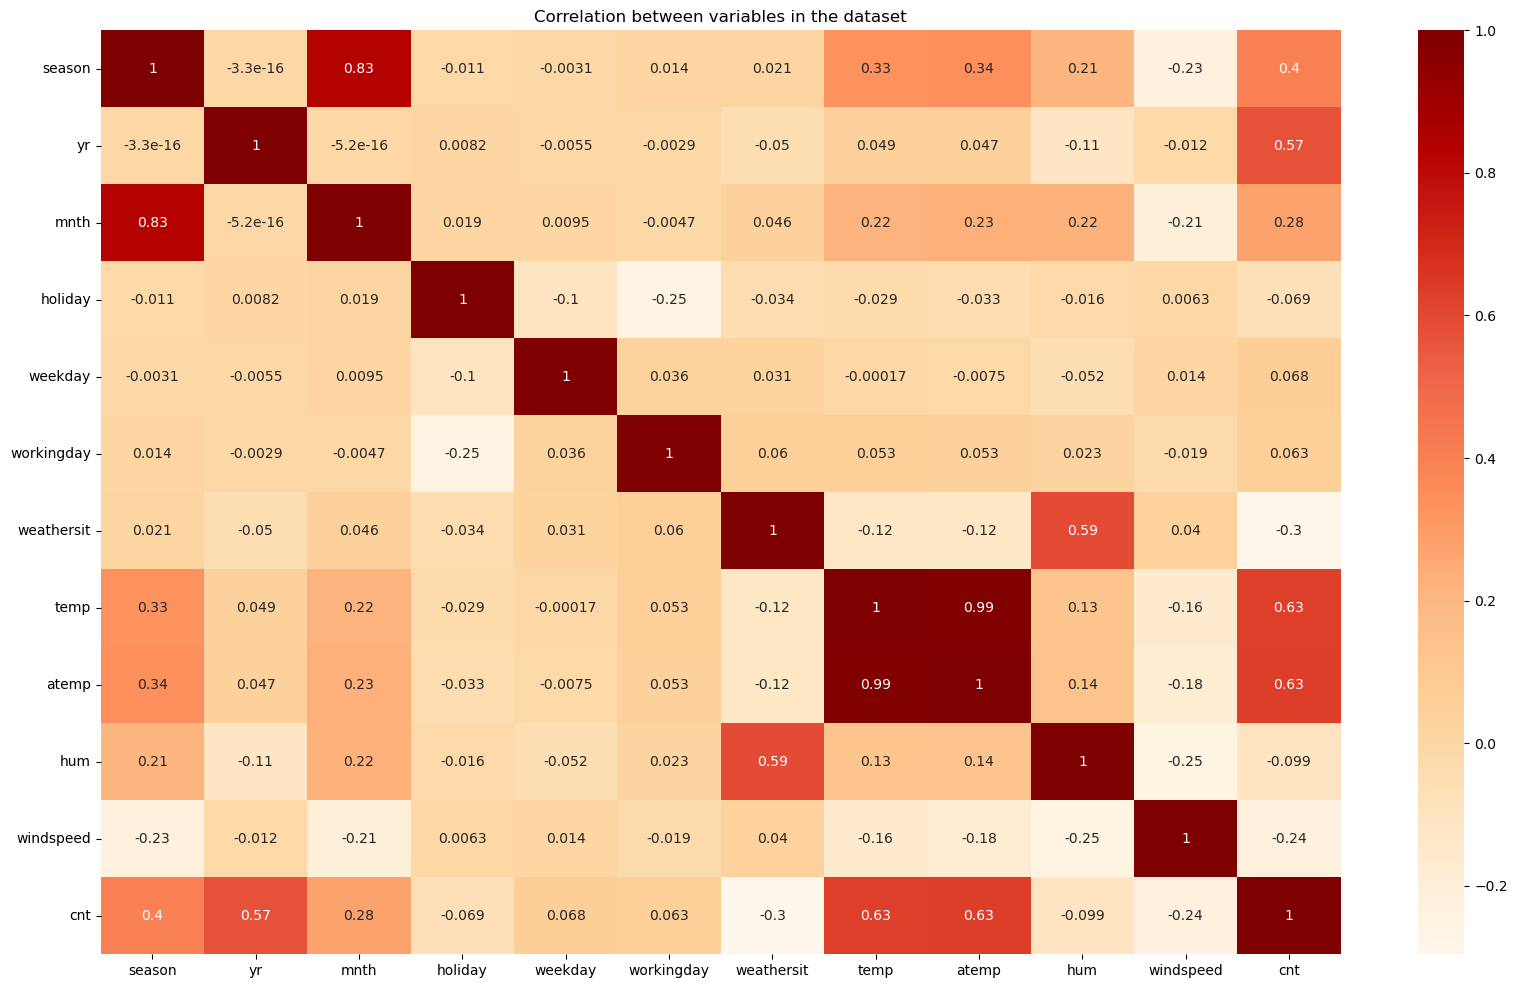

In [17]:
plt.figure(figsize=(20, 12))
sns.heatmap(bike_df.corr(), cmap='OrRd', annot=True)
plt.title('Correlation between variables in the dataset')
plt.show()

### we see there is an  strong corelation for the cnt with temp,atemp,season so there by we can go ahead with the linear regression model

In [19]:
#dropping the atemp column as it has the same corelation as temp column

bike_df=bike_df.drop('atemp',axis=1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [20]:
bike_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

In [21]:
# creating the dummy varaibles for month,weekday,weathersit and season
month = pd.get_dummies(bike_mod['mnth'],drop_first=True ).astype(int)
weekday = pd.get_dummies(bike_mod.weekday,drop_first=True ).astype(int)
weathersit = pd.get_dummies(bike_mod.weathersit,drop_first=True ).astype(int)
season = pd.get_dummies(bike_mod.season,drop_first=True ).astype(int)

In [22]:
# adding dumm varaible to the original dataframe 
bike_df=pd.concat([bike_df,month,weekday,weathersit,season],axis=1)


In [23]:
# removing the columns which are having dummy values 

bike_df=bike_df.drop(['mnth','weekday','weathersit','season'],axis=1)


In [24]:
bike_df.shape

(730, 29)

In [25]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    int32  
 8   Dec            730 non-null    int32  
 9   Feb            730 non-null    int32  
 10  Jan            730 non-null    int32  
 11  July           730 non-null    int32  
 12  June           730 non-null    int32  
 13  Mar            730 non-null    int32  
 14  May            730 non-null    int32  
 15  Nov            730 non-null    int32  
 16  Oct            730 non-null    int32  
 17  Sep            730 non-null    int32  
 18  Mon       

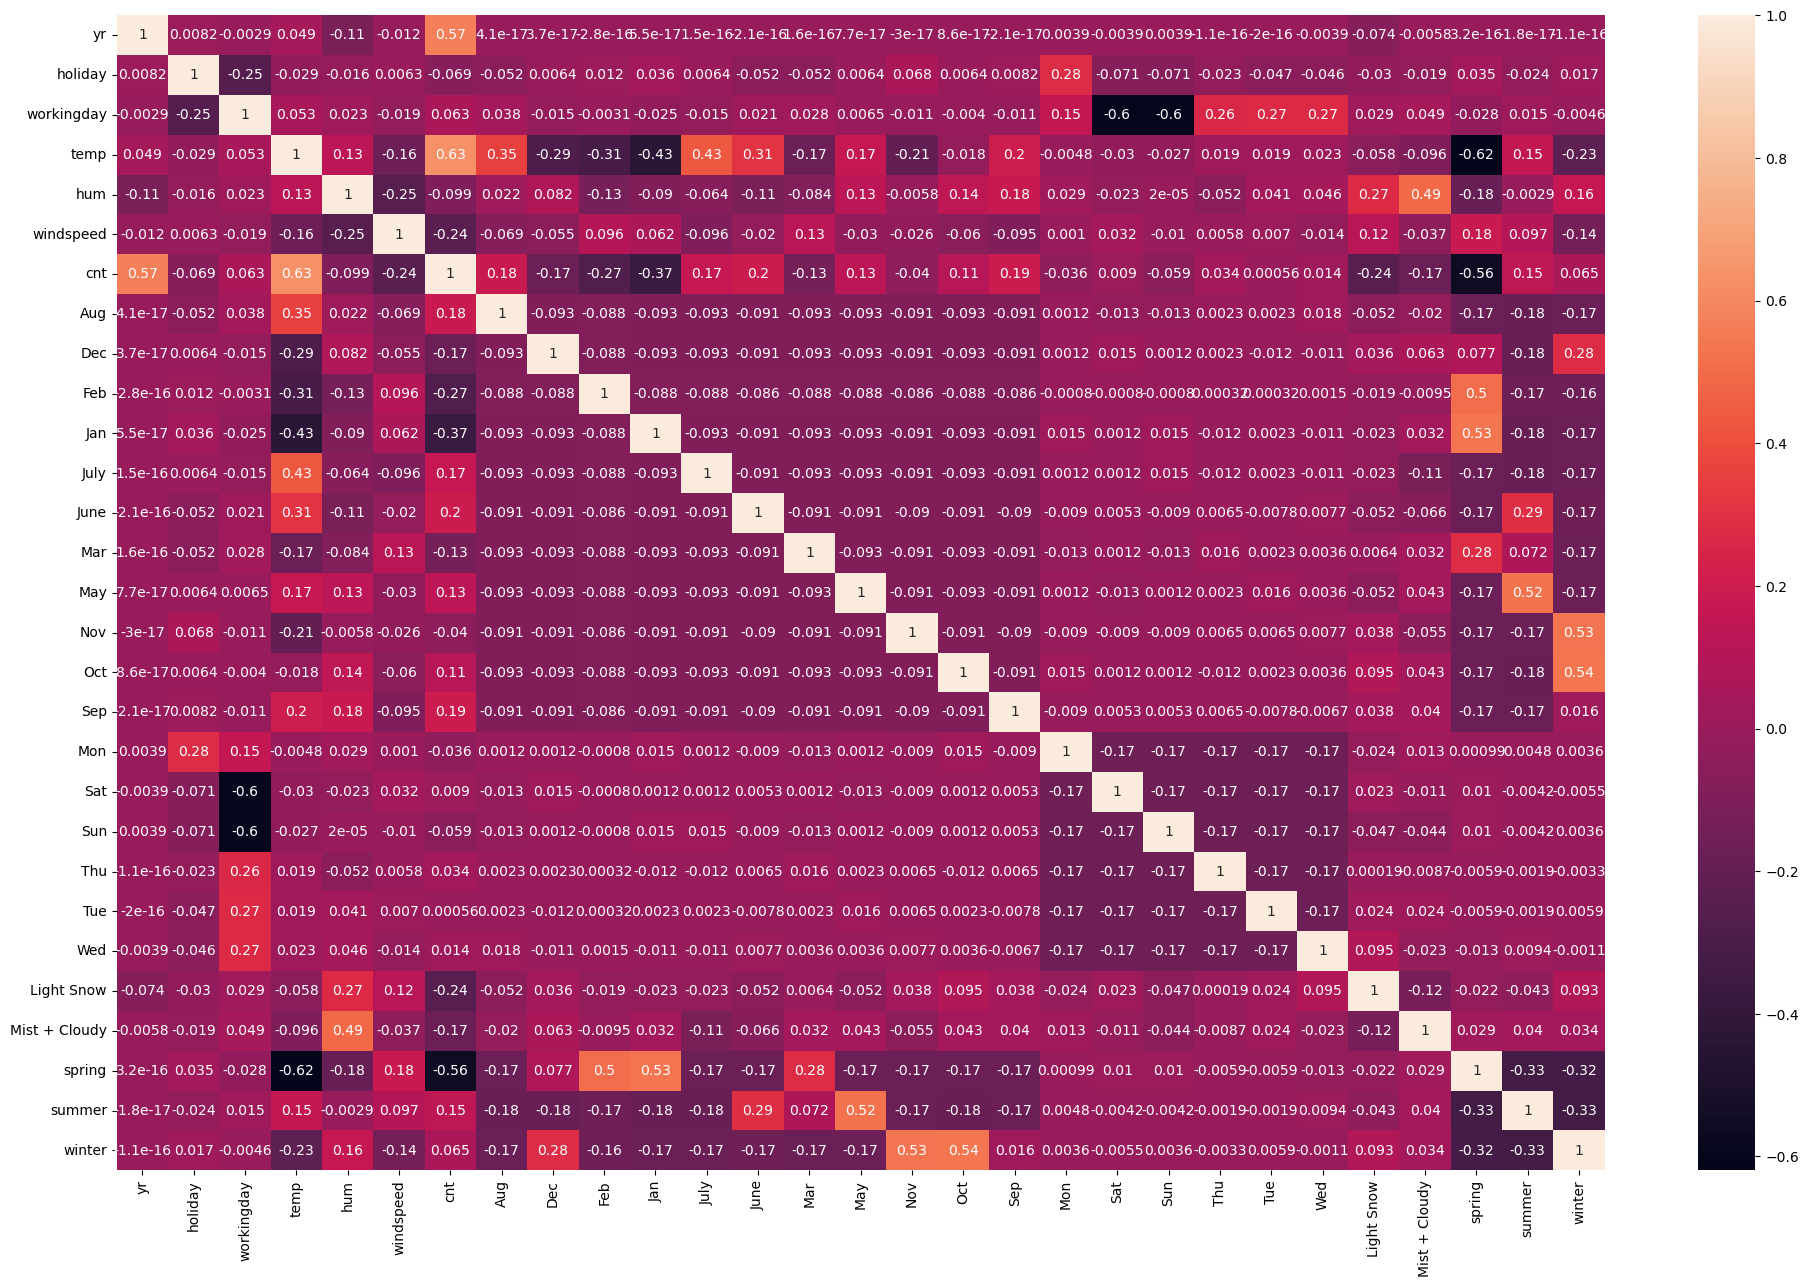

In [26]:
#checking heatmap

plt.figure(figsize=(24,15))
sns.heatmap(bike_df.corr(),annot=True)
plt.show()


In [27]:
# splitting the model for traning and testing 

bike_train,bike_test=train_test_split(bike_df,train_size=0.7,random_state=100)



In [28]:

bike_test.shape

(220, 29)

In [29]:

bike_train.shape

(510, 29)

In [30]:
#scaling the varaibles with the minmax scaler 
scale=MinMaxScaler()
vars=['hum','windspeed','temp','cnt']
bike_train[vars]=scale.fit_transform(bike_train[vars])

In [31]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


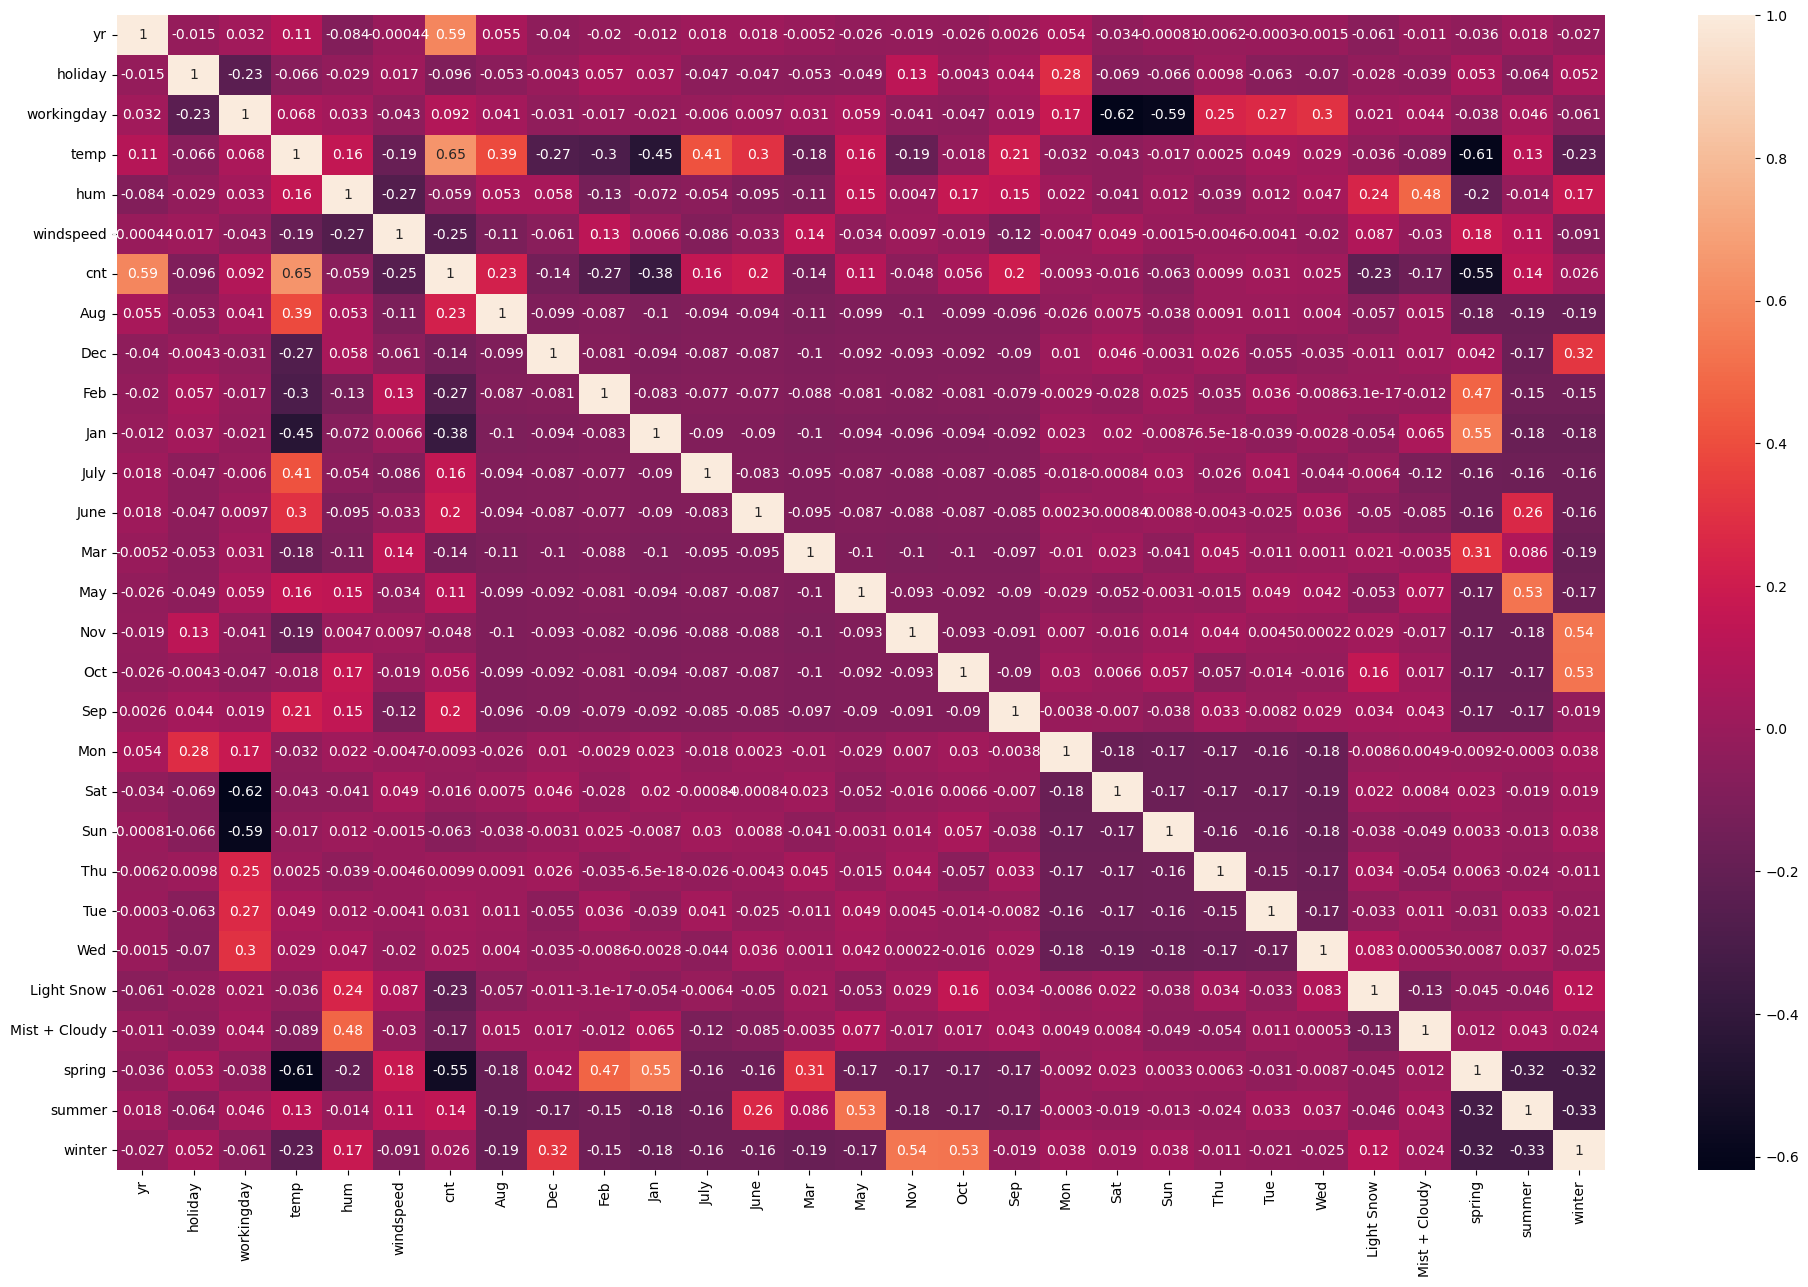

In [32]:
#All the values are having max as 1
#checking heat map again to check the corelation 
plt.figure(figsize=(24,15))
sns.heatmap(bike_train.corr(),annot=True)
plt.show()

In [33]:
# from the above one we are able to conclue temp is highly corelated with cnt 
# starting to train the model

y_train=bike_train.pop('cnt')
X_train=bike_train


In [34]:
X_train_data=sm.add_constant(X_train['temp'])

#creating first model
linear=sm.OLS(y_train,X_train_data)

linear_model=linear.fit()
linear_model.params


const    0.169031
temp     0.640944
dtype: float64

In [35]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           2.46e-61
Time:                        19:34:55   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# R-square value if 41.6% which means the model is able to explain 41% variance in count quandity 

In [37]:
# adding another varaible and making it a multiple linear regression 

X_train_data=sm.add_constant(X_train[['temp','yr']])

#creating first model
linear=sm.OLS(y_train,X_train_data)

linear_model=linear.fit()
linear_model.params


const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [38]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          3.34e-130
Time:                        19:34:55   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# R-value of the Model has been increased to 69.2% percent the P value of the variables are 0 which means null hypotheses is true


In [40]:
# Adding all varaibles and finding the new R - sqaure value 

X_train_data=sm.add_constant(X_train)

#creating first model
linear=sm.OLS(y_train,X_train_data)

linear_model=linear.fit()
linear_model.params



const            0.243106
yr               0.232438
holiday          0.010042
workingday       0.096177
temp             0.445359
hum             -0.151473
windspeed       -0.186010
Aug              0.020376
Dec             -0.044277
Feb             -0.032441
Jan             -0.063315
July            -0.033848
June             0.004602
Mar              0.001274
May              0.024673
Nov             -0.039879
Oct              0.007546
Sep              0.085938
Mon             -0.020931
Sat              0.095554
Sun              0.041333
Thu             -0.009131
Tue             -0.017931
Wed             -0.005495
Light Snow      -0.255835
Mist + Cloudy   -0.059551
spring          -0.044834
summer           0.043002
winter           0.107632
dtype: float64

In [41]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          3.00e-181
Time:                        19:34:55   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2431      0.035      6.888      0.000       0.174       0.312
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday           0.0100      0.024      0.418      0.676      -0.037       0.057
workingday        0.0962      0.012      7.835      0.000       0.072       0.120
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
July             -0.0338      0.035     -0.969      0.333      -0.102       0.035
June              0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Mon              -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat               0.0956      0.014      6.958      0.000       0.069       0.123
Sun               0.0413      0.014      2.964      0.003       0.014       0.069
Thu              -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue              -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer            0.0430      0.026      1.645      0.101      -0.008       0.094
winter            0.1076      0.028      3.853      0.000       0.053       0.163
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     6.88e+15
================================================================

In [42]:
# R sqaure value is increased to 85.3% 

#using RFE

lm=LinearRegression()
lm.fit(X_train,y_train)
# setting the variable to 15 
rfe=RFE(lm,n_features_to_select =15)
# fitting rfe object 
rfe=rfe.fit(X_train,y_train)



In [43]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [44]:

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [45]:
#getting the selected feature variables in one one variable
good_rfe = X_train.columns[rfe.support_]
good_rfe


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan',
       'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [46]:
X_train[good_rfe].head()

,yr,holiday,workingday,temp,hum,windspeed,Jan,July,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,1,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,1,0,1,0


# Building model using selected RFE values 

In [48]:


X_train_rfe_record=sm.add_constant(X_train[good_rfe])

mlr=sm.OLS(y_train,X_train_rfe_record)

mlr_model=mlr.fit()

mlr_model.params

const            0.251893
yr               0.230527
holiday         -0.058173
workingday       0.043335
temp             0.509619
hum             -0.156299
windspeed       -0.186259
Jan             -0.034512
July            -0.052918
Sep              0.081395
Sat              0.053552
Light Snow      -0.247464
Mist + Cloudy   -0.056318
spring          -0.050897
summer           0.050762
winter           0.093301
dtype: float64

In [49]:
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          4.22e-191
Time:                        19:34:55   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969      0.000       0.181       0.323
yr                0.2305      0.008     28.795      0.000       0.215       0.246
holiday          -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday        0.0433      0.012      3.762      0.000       0.021       0.066
temp              0.5096      0.034     14.837      0.000       0.442       0.577
hum              -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed        -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Jan              -0.0345      0.017     -1.989      0.047      -0.069      -0.000
July             -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep               0.0814      0.016      4.945      0.000       0.049       0.114
Sat               0.0536      0.014      3.694      0.000       0.025       0.082
Light Snow       -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist + Cloudy    -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring           -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer            0.0508      0.015      3.423      0.001       0.022       0.080
winter            0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# building model using selected RFE values 

X_train_rfe_record=sm.add_constant(X_train[good_rfe])

mlr=sm.OLS(y_train,X_train_rfe_record)

mlr_model=mlr.fit()

mlr_model.params


const            0.251893
yr               0.230527
holiday         -0.058173
workingday       0.043335
temp             0.509619
hum             -0.156299
windspeed       -0.186259
Jan             -0.034512
July            -0.052918
Sep              0.081395
Sat              0.053552
Light Snow      -0.247464
Mist + Cloudy   -0.056318
spring          -0.050897
summer           0.050762
winter           0.093301
dtype: float64

In [51]:
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          4.22e-191
Time:                        19:34:55   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969      0.000       0.181       0.323
yr                0.2305      0.008     28.795      0.000       0.215       0.246
holiday          -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday        0.0433      0.012      3.762      0.000       0.021       0.066
temp              0.5096      0.034     14.837      0.000       0.442       0.577
hum              -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed        -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Jan              -0.0345      0.017     -1.989      0.047      -0.069      -0.000
July             -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep               0.0814      0.016      4.945      0.000       0.049       0.114
Sat               0.0536      0.014      3.694      0.000       0.025       0.082
Light Snow       -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist + Cloudy    -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring           -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer            0.0508      0.015      3.423      0.001       0.022       0.080
winter            0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# dropping the constant value 
X_train_rfe_record=X_train_rfe_record.drop('const', axis=1)

In [53]:
# the model has R square value as 82 % , checking the VIF value so that the varaible with high VIF value and the P-VALUE can be removed 
# low VIF value and the low p-value can be kept 


vif = pd.DataFrame()
X = X_train_rfe_record
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif



,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Mist + Cloudy,2.29
0,yr,2.09
9,Sat,1.98


In [54]:
# removing the column with more VIF
X_train_new=X_train_rfe_record.drop(['hum'],axis=1)



In [55]:
X_train_new.head()

,yr,holiday,workingday,temp,windspeed,Jan,July,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.255342,0,0,0,1,0,1,1,0,0
728,1,0,0,0.245101,0.663106,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.188475,0,0,0,1,0,1,0,1,0
111,0,0,1,0.345824,0.380981,0,0,0,0,0,1,0,1,0


In [56]:
X_train_new=sm.add_constant(X_train_new)

#creating first model
linear=sm.OLS(y_train,X_train_new)

linear_model=linear.fit()
linear_model.params


const            0.173669
yr               0.234461
holiday         -0.055784
workingday       0.046359
temp             0.472207
windspeed       -0.156254
Jan             -0.039197
July            -0.047871
Sep              0.075470
Sat              0.058305
Light Snow      -0.290800
Mist + Cloudy   -0.081261
spring          -0.059888
summer           0.044507
winter           0.078366
dtype: float64

In [57]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          1.60e-188
Time:                        19:34:56   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1737      0.031      5.520      0.000       0.112       0.235
yr                0.2345      0.008     29.009      0.000       0.219       0.250
holiday          -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday        0.0464      0.012      3.966      0.000       0.023       0.069
temp              0.4722      0.034     14.005      0.000       0.406       0.538
windspeed        -0.1563      0.025     -6.286      0.000      -0.205      -0.107
Jan              -0.0392      0.018     -2.227      0.026      -0.074      -0.005
July             -0.0479      0.018     -2.614      0.009      -0.084      -0.012
Sep               0.0755      0.017      4.527      0.000       0.043       0.108
Sat               0.0583      0.015      3.968      0.000       0.029       0.087
Light Snow       -0.2908      0.024    -11.977      0.000      -0.339      -0.243
Mist + Cloudy    -0.0813      0.009     -9.437      0.000      -0.098      -0.064
spring           -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer            0.0445      0.015      2.967      0.003       0.015       0.074
winter            0.0784      0.017      4.562      0.000       0.045       0.112
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
X_train_new=X_train_new.drop('const', axis=1)

In [59]:
# checking again the VIF values
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,yr,2.08
13,winter,1.98
8,Sat,1.97
5,Jan,1.62
6,July,1.59


In [60]:
#Dropping workingday and jan it has high VIF and  p-value 

X_train_new=X_train_new.drop(['workingday','Jan'],axis=1)


In [61]:
X_train_new=sm.add_constant(X_train_new)


linear=sm.OLS(y_train,X_train_new)

linear_model=linear.fit()
linear_model.params

const            0.195960
yr               0.233995
holiday         -0.094100
temp             0.492397
windspeed       -0.149965
July            -0.052510
Sep              0.076649
Sat              0.019908
Light Snow      -0.284647
Mist + Cloudy   -0.080263
spring          -0.067013
summer           0.046808
winter           0.081610
dtype: float64

In [62]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.6
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          1.68e-186
Time:                        19:34:56   Log-Likelihood:                 500.38
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     497   BIC:                            -919.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1960      0.030      6.628      0.000       0.138       0.254
yr                0.2340      0.008     28.451      0.000       0.218       0.250
holiday          -0.0941      0.026     -3.605      0.000      -0.145      -0.043
temp              0.4924      0.033     14.839      0.000       0.427       0.558
windspeed        -0.1500      0.025     -5.974      0.000      -0.199      -0.101
July             -0.0525      0.019     -2.820      0.005      -0.089      -0.016
Sep               0.0766      0.017      4.515      0.000       0.043       0.110
Sat               0.0199      0.011      1.761      0.079      -0.002       0.042
Light Snow       -0.2846      0.025    -11.529      0.000      -0.333      -0.236
Mist + Cloudy    -0.0803      0.009     -9.176      0.000      -0.097      -0.063
spring           -0.0670      0.021     -3.174      0.002      -0.108      -0.026
summer            0.0468      0.015      3.078      0.002       0.017       0.077
winter            0.0816      0.017      4.733      0.000       0.048       0.115
==============================================================================
Omnibus:                       65.293   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.851
Skew:                          -0.706   Prob(JB):                     2.60e-31
Kurtosis:                       5.152   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#dropping const value
X_train_new=X_train_new.drop(['const'],axis=1)


In [64]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif


,Features,VIF
2,temp,5.12
3,windspeed,4.62
10,summer,2.23
9,spring,2.10
0,yr,2.07
11,winter,1.79
4,July,1.58
8,Mist + Cloudy,1.55
5,Sep,1.34
6,Sat,1.19


In [65]:
# dropping the column which has p values and more R values 
X_train_new=X_train_new.drop(['Sat','July',"summer","windspeed"],axis=1)




In [66]:
X_train_new=sm.add_constant(X_train_new)

#creating first model
linear=sm.OLS(y_train,X_train_new)

linear_model=linear.fit()
linear_model.params

const            0.211314
yr               0.234419
holiday         -0.099021
temp             0.427414
Sep              0.076818
Light Snow      -0.300808
Mist + Cloudy   -0.075715
spring          -0.117331
winter           0.053756
dtype: float64

In [67]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     278.9
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          4.15e-179
Time:                        19:34:56   Log-Likelihood:                 471.47
No. Observations:                 510   AIC:                            -924.9
Df Residuals:                     501   BIC:                            -886.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2113      0.022      9.576      0.000       0.168       0.255
yr                0.2344      0.009     27.088      0.000       0.217       0.251
holiday          -0.0990      0.027     -3.610      0.000      -0.153      -0.045
temp              0.4274      0.030     14.381      0.000       0.369       0.486
Sep               0.0768      0.016      4.733      0.000       0.045       0.109
Light Snow       -0.3008      0.026    -11.620      0.000      -0.352      -0.250
Mist + Cloudy    -0.0757      0.009     -8.237      0.000      -0.094      -0.058
spring           -0.1173      0.016     -7.399      0.000      -0.148      -0.086
winter            0.0538      0.013      4.167      0.000       0.028       0.079
==============================================================================
Omnibus:                       68.279   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.771
Skew:                          -0.678   Prob(JB):                     1.12e-38
Kurtosis:                       5.527   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
X_train_new=X_train_new.drop(['const'],axis=1)

In [69]:

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif



,Features,VIF
2,temp,2.39
0,yr,2.04
5,Mist + Cloudy,1.49
7,winter,1.29
6,spring,1.23
3,Sep,1.15
4,Light Snow,1.06
1,holiday,1.04


In [70]:
#we can keep this model as P-value and the VIF value are with in the given range 
#1. the low p-value helps us to reject null hypothesis 
#2 The R square value is acheived at 81.7%  which suggests the high corelation between the dependent variables 


In [71]:
# Residual analysis 

X_train_latest=sm.add_constant(X_train_new)
X_train_latest

,const,yr,holiday,temp,Sep,Light Snow,Mist + Cloudy,spring,winter
576,1.0,1,0,0.815169,0,0,0,0,0
426,1.0,1,0,0.442393,0,0,1,1,0
728,1.0,1,0,0.245101,0,0,0,1,0
482,1.0,1,0,0.395666,0,0,1,0,0
111,1.0,0,0,0.345824,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0,0,0,0,0
53,1.0,0,0,0.202618,0,0,0,1,0
350,1.0,0,0,0.248216,0,0,1,0,1
79,1.0,0,0,0.462664,0,0,1,0,0


In [72]:
y_train_prediction=linear_model.predict(X_train_latest)

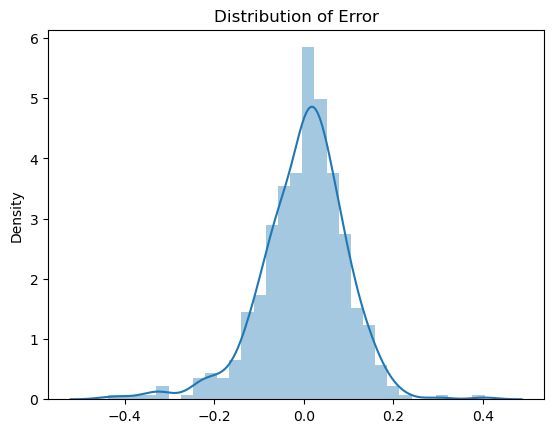

In [73]:
res = y_train - y_train_prediction
sns.distplot(res)
plt.title('Distribution of Error')
plt.show()

In [74]:
#perform standardization minmax scaling on test set

bike_test[vars]=scale.fit_transform(bike_test[vars])

In [75]:
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.546074,0.508362,0.418803,0.517923,0.059091,0.086364,0.100000,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.248645,0.200875,0.187683,0.239498,0.236333,0.281541,0.300684,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.361079,0.284201,0.361045,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.491299,0.403318,0.520681,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.650989,0.523975,0.687956,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
# Building the test model

y_test= bike_test.pop('cnt')
X_test=bike_test


In [77]:
X_test_new= X_test[X_train_new.columns]

In [78]:
X_train_new

,yr,holiday,temp,Sep,Light Snow,Mist + Cloudy,spring,winter
576,1,0,0.815169,0,0,0,0,0
426,1,0,0.442393,0,0,1,1,0
728,1,0,0.245101,0,0,0,1,0
482,1,0,0.395666,0,0,1,0,0
111,0,0,0.345824,0,0,1,0,0
...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0,0,0,0,0
53,0,0,0.202618,0,0,0,1,0
350,0,0,0.248216,0,0,1,0,1
79,0,0,0.462664,0,0,1,0,0


In [79]:
#making predictions
X_test_new = sm.add_constant(X_test_new)
y_pred = linear_model.predict(X_test_new)

In [80]:
y_pred

184    0.394426
535    0.835288
299    0.401446
221    0.591878
152    0.562537
         ...   
702    0.714893
127    0.456532
640    0.742343
72     0.223855
653    0.710634
Length: 220, dtype: float64

In [81]:
#R2 score on the test set
r2_score(y_test, y_pred)

0.8033332001439315

In [82]:
#R2 score on the train set 
r2_score(y_train, y_train_prediction)

0.8166499445177376

# The equation of the best fitted line is 
0.2113+0.2344*Yr-0.099*holiday+0.4274*temp+0.0768*Sep-0.3008*Light Snow -(0.0757*Mist + Cloudy)-0.1173*spring+0.0538*winter



In [84]:
# Finding the mean square error for the test and the training data
train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_prediction))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Train set MSE', train_mse)
print('Test set MSE', test_mse)


Train set MSE 0.009216267673213176
Test set MSE 0.01122940974763825


# Conclusion:

- 1.The model has the R2 value as 81.7% the model is able to explains the variance accurently on the test set 
- 2.The mean squre error of the test and the train set both are near to 0
- 3.we can say that boombike company is dependent on temperature and if its a working day or not , the demand is more in summer and spring when compared     to winter 
